<h2> DATA 115: Introduction to Data Analytics. Fall 2024 </h2>
<h3> Problem Set 4 </h3>
<h3> Team <i> 6 </i></h3>
<h3> Type students' names:  <i> Abigail Kubli, Zander Edmond, Ananya Mukherjee, Mekhai Derbe, Cassidy Weeks</i></h3>

#### 1. In your own words, write brief answers to the following questions:

##### (a) What is the curse of dimensionality?

The curse of dimensionality refers to the problems and complications that occur in terms of analysing and organizing datasets as and when the variables and features of a dataset increases.
Dimensions are the variables you record in a data set, and the curse of dimensionality is when you add many dimensions to a data set and it causes problems. These problems can be that the patterns might not be relevant anymore, data sparsity, overfitting, or even visual challenges.

##### (b) What is the difference between MDS and PCA?

MDS is a technique used to visualize data sets with a lower amount of dimensions. It focuses on recording the relative distances between two points, and uses different distance metrics making it suitable for non-linear relationships. While PCA is a linear method that reduces the dissimilarity in the data by finding orthogonal components that have the maximum variance. PCA only works when data is linear and normally distributed, and when there is a multivariate correlation between the features.


##### (c) Give an example of a dataset for which dimension reduction would be a useful first step.

An example could be the data collected on the customer behavior and demographic of online shoppers. A lot of the data such as income, past purchases, products browsed might be highly correlated, so using techniques such as MDS and PCA you could get rid of some data that isn't as necessary and cut down on some problems.


##### (d) What is a dendrogram and what type of clustering method is it used to represent?


A dendrogram is a data visualisation technique used to visualise hierarchical relationships between data in the form of a tree diagram. It represents hierarchical clustering methods such as Agglomerative Clustering and Divisive Clustering.

##### (e) What is the difference between supervised and unsupervised learning?

Supervised machine learning relies on labelled data whereas unsupervised machine learning processes raw data.

#### 2. Load the data in `iris_data` as a dataframe in Python. This is a classic dataset (originally published in 1936) that is frequently used as an initial set of test data. It consists of four numerical columns reporting the length and width of the sepal and petals of 150 iris plants and a final column reporting the specific subspecies. The data file also has an additional column with numerical column representing the subspecies. 

##### (a) Make a scatterplot of petal width vs. petal length colored by the subspecies

Text(0.5, 1.0, 'Width vs. Length')

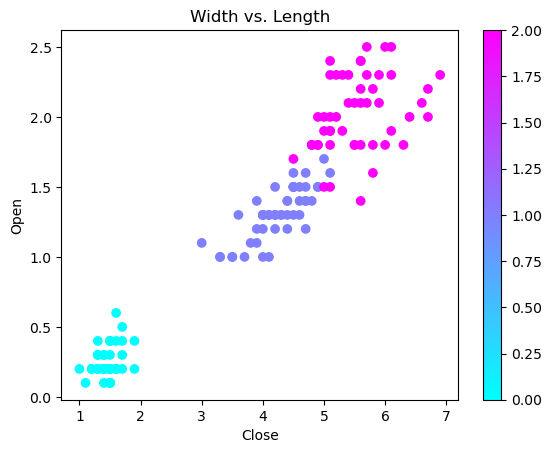

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

iris = pd.read_csv("./iris_data.csv")

plt.scatter(iris['petal_length'],iris['petal_width'], c=iris['type_numeric'], cmap='cool')
plt.colorbar()
plt.ylabel('Open')
plt.xlabel('Close')
plt.title('Width vs. Length')

##### (b) Perform PCA on the data with the four numerical columns as inputs and make a scatter plot of the top two principal components colored by subspecies.


C:\Users\abi_s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


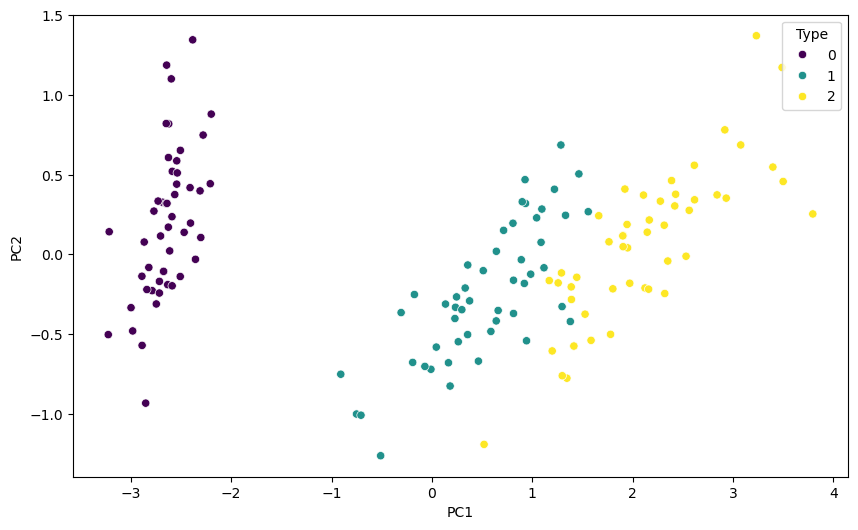

In [54]:
# Perform PCA
pca = PCA(n_components=4)
iris_pca = pca.fit_transform(iris.iloc[:, :4])

# Add principal components to the DataFrame
iris['pc1'] = iris_pca[:, 0]
iris['pc2'] = iris_pca[:, 1]
iris['pc3'] = iris_pca[:, 2]
iris['pc4'] = iris_pca[:, 3]

pca_kmeans = KMeans(n_clusters=4).fit(iris_pca)
iris['pcacluster'] = pca_kmeans.labels_

# Create scatter plots

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='pc1', y='pc2', hue='type_numeric', palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Type')
plt.show()

##### (c) What proportion of the variance is explained by these two components?


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

##### (d) What are the loadings for each of the original numerical columns?

In [26]:
# Create a contingency table of 'Type' and 'pcacluster'
contingency_table = pd.crosstab(iris['type_numeric'], iris['pcacluster'])
print(contingency_table)

# Calculate the total within-cluster sum of squares for the PCA clustering
tot_withinss_pca = pca_kmeans.inertia_
print(f"Total within-cluster sum of squares for PCA clustering: {tot_withinss_pca}")

pcacluster     0   1   2   3
type_numeric                
0              0   0  50   0
1             27  23   0   0
2              1  22   0  27
Total within-cluster sum of squares for PCA clustering: 57.35501904761906


#### 3. Continue working with `iris_data` dataframe.

##### (a) Apply k-means clustering to the four numeric columns with three clusters.

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type',
       'type_numeric'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


C:\Users\abi_s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


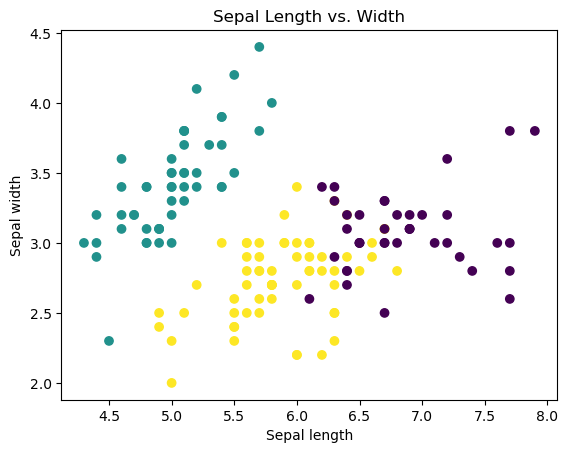

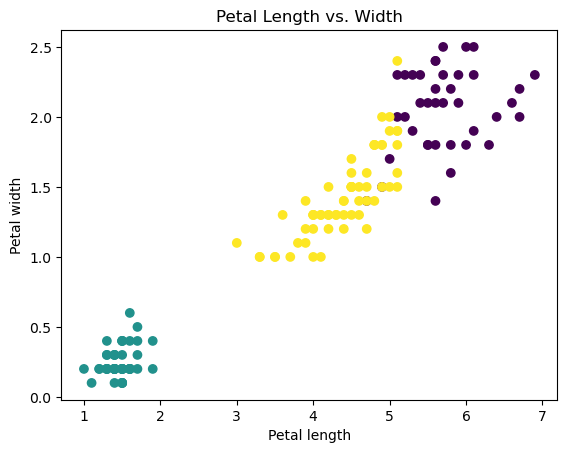

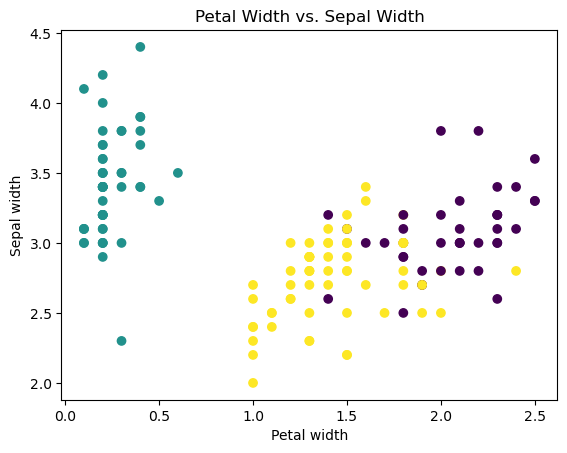

In [25]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

os.environ["OMP_NUM_THREADS"] = "1"

iris = pd.read_csv('iris_data.csv')

print(iris.columns)

numeric_columns = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print(numeric_columns.head()) 

from sklearn.cluster import KMeans
os.environ["OMP_NUM_THREADS"] = "1"

kmeans = KMeans(n_clusters=3)

kmeans.fit(numeric_columns)

labels = kmeans.predict(numeric_columns)

plt.scatter(numeric_columns['sepal_length'], numeric_columns['sepal_width'], c=labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Length vs. Width')
plt.show()

plt.scatter(numeric_columns['petal_length'], numeric_columns['petal_width'], c=labels)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Length vs. Width')
plt.show()

plt.scatter(numeric_columns['petal_width'], numeric_columns['sepal_width'], c=labels)
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Petal Width vs. Sepal Width')
plt.show()

##### (b) Apply k-means clustering to the two principal components with three clusters.


C:\Users\abi_s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abi_s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


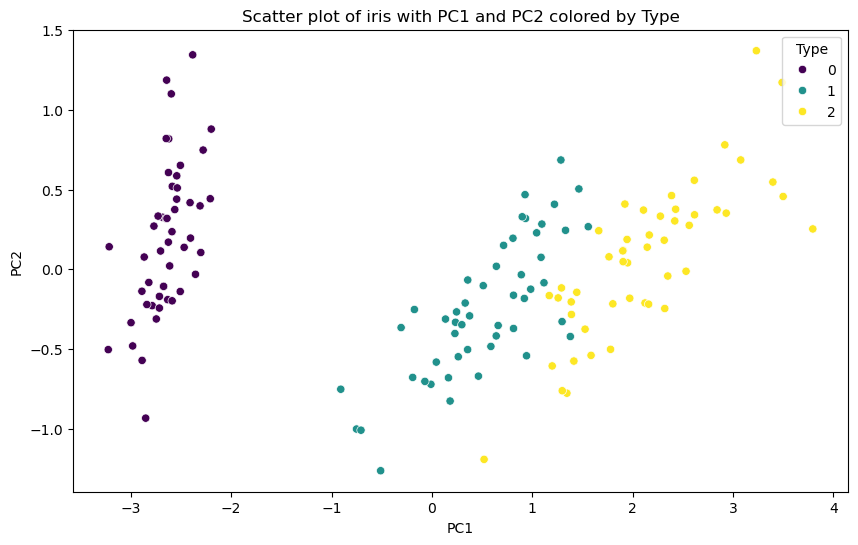

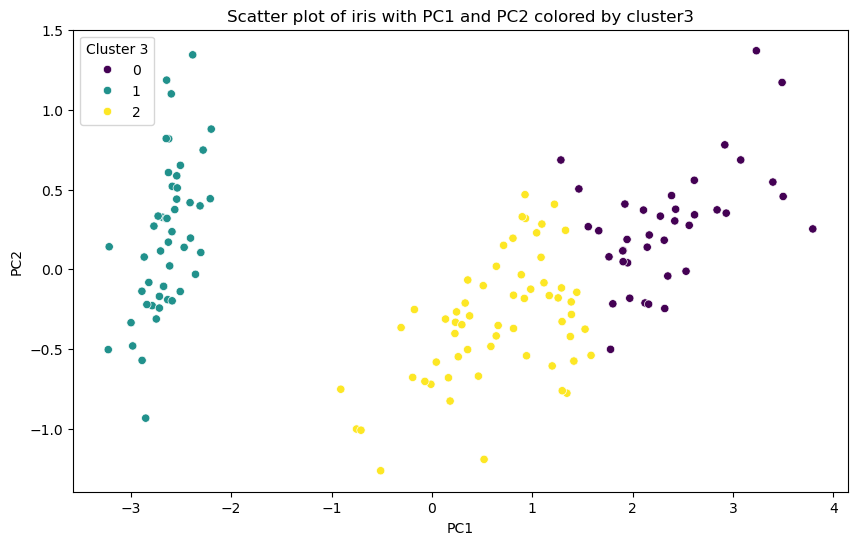

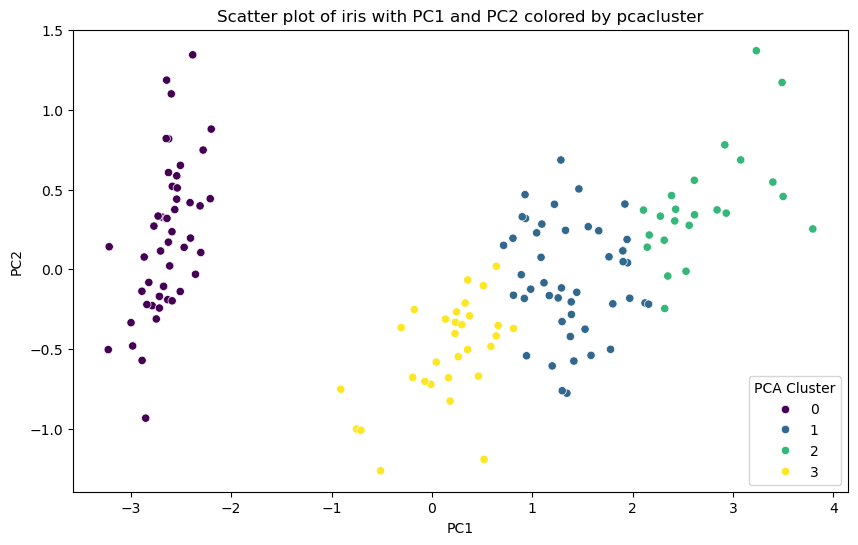

pcacluster     0   1   2   3
type_numeric                
0             50   0   0   0
1              0  21   0  29
2              0  26  23   1
Total within-cluster sum of squares for PCA clustering: 53.990714294562295


In [52]:
kmeans3 = KMeans(n_clusters=3).fit(iris.iloc[:, :4])
iris['cluster3'] = kmeans3.labels_

# Perform PCA
pca = PCA(n_components=3)
iris_pca = pca.fit_transform(iris.iloc[:, :4])

# Add principal components to the DataFrame
iris['pc1'] = iris_pca[:, 0]
iris['pc2'] = iris_pca[:, 1]

# Perform k-means clustering on the first two principal components
pca_kmeans = KMeans(n_clusters=4).fit(iris_pca)
iris['pcacluster'] = pca_kmeans.labels_
# Create scatter plots

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='pc1', y='pc2', hue='type_numeric', palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of iris with PC1 and PC2 colored by Type')
plt.legend(title='Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='pc1', y='pc2', hue='cluster3', palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of iris with PC1 and PC2 colored by cluster3')
plt.legend(title='Cluster 3')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='pc1', y='pc2', hue='pcacluster', palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of iris with PC1 and PC2 colored by pcacluster')
plt.legend(title='PCA Cluster')
plt.show()

# Create a contingency table of 'Type' and 'pcacluster'
contingency_table = pd.crosstab(iris['type_numeric'], iris['pcacluster'])
print(contingency_table)

# Calculate the total within-cluster sum of squares for the PCA clustering
tot_withinss_pca = pca_kmeans.inertia_
print(f"Total within-cluster sum of squares for PCA clustering: {tot_withinss_pca}")

##### (c) Which of the two k-means clusterings is more accurate at predicting the subspecies correctly?

The code chunk combines PCA with kmeans clustering and did a better job of matching the ground truth clusters, with less data available. So the PCA k-means cluster wass more accuraate aat predicting the subspecies correctly